In [1]:
#Import packages
import math
import numpy as np
import pandas as pd
from lmfit import Model, Parameters
import matplotlib.pyplot as plt
from lmfit import Model, Parameters
import matplotlib.font_manager
from matplotlib.pyplot import figure
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": True,
    "font.weight": "bold",
    "font.family": "serif",
    "font.sans-serif": ["Helvetica"]})

In [2]:
#import data, load data into arrays and define axes 

FA   = pd.read_csv("Readings/CSV/Frequency-Amplitude.csv") 
FP   = pd.read_csv("Readings/CSV/Frequency-PhaseShift.csv")
LFA  = pd.read_csv("Readings/CSV/LockIn-Frequency-Amplitude.csv")
LFP  = pd.read_csv("Readings/CSV/LockIn-Frequency-PhaseShift.csv")

FA   = np.array(FA) 
FP   = np.array(FP)
LFA  = np.array(LFA)
LFP  = np.array(LFP)

fa_frequency   = FA[:,2]
fa_amplitude   = FA[:,1]
fp_frequency   = FP[:,2]
fp_phaseshift  = FP[:,1]
lfa_frequency  = LFA[:,2]
lfa_amplitude  = LFA[:,1]
lfp_frequency  = LFP[:,2]
lfp_phaseshift = LFP[:,1]


In [3]:
# Define functions

def Filter(freq,R,C):
    omega = 2*np.pi*freq
    vout=( 1./(1j*R*omega*C+1.))
    return(vout)

In [4]:
#Define constants in our circuit

C = 0.022e-6 # 0.022 microFarads
R = 1.5e6 # 1.5 megaOhms
tau = R*C # We calculate the time constant since we need it all over our plots

In [46]:
f = np.linspace(10,10000,1000)
vout_c = Filter(f,R,C)
F_cut = 1./(2.*np.pi*R*C)
print("Filter cut off frequency is: {:7.2f} Hz".format(F_cut))

Filter cut off frequency is:    4.82 Hz


In [50]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)# <- note now we're calling the function 'formula' with x
    
  #  plt.plot(x, y)  
  #  plt.show() 

def amplitude_fit(x):
    value = 320/np.sqrt(1+(2*np.pi*tau*x)**2)
    return value

graph(amplitude_fit, range(0, 100000))

def phase_shift_fit(x):
    ps_value = -180/pi*np.arctan(2*np.pi*tau*x)
    return ps_value

In [51]:
def Amplitude_of_Filter(x,amp,tau):
    lfa_amplitude=amp/np.sqrt(1+(2*np.pi*tau*x)**2)
    return lfa_amplitude

In [52]:
amp_model = Model(Amplitude_of_Filter)

In [53]:
print ("Independent vars: ", amp_model.independent_vars) #print out to confirm what we just did
print ("Parameters: ", amp_model.param_names)


Independent vars:  ['x']
Parameters:  ['amp', 'tau']


In [54]:
p = Parameters()
p.add_many(('amp', lfa_amplitude.mean(), True, 0, lfa_amplitude.max(), None), # params for first fit, 
           ('tau', tau, False, None, None, None))

In [55]:
result = amp_model.fit(lfa_amplitude, x=lfa_frequency, params=p, weights = None )

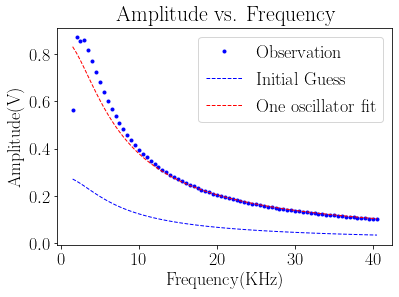

In [56]:
plt.plot(lfa_frequency,lfa_amplitude,'b.', label="Observation")
plt.plot(lfa_frequency, result.init_fit, 'b--', label="Initial Guess", linewidth=1)
plt.plot(lfa_frequency, result.best_fit, 'r--', label="One oscillator fit", linewidth=1)
plt.xlabel("Frequency(KHz)")
plt.ylabel("Amplitude(V)")
plt.title("Amplitude vs. Frequency")
plt.legend()
plt.savefig("Images/LA-Amplitude Fit.png")
plt.show()

In [57]:
# Create a fitting model for the phase shift


ps_model = Model(Filter)
params_fa = Parameters()
params_fa.add_many(('fa_amplitude', 320, True, 0, 350, None), # params for first fit, 
                ('R', 1.5e6, False, 0, None, None),
                ('C', 2.26e-6, False, 0, None, None))
result =Model.fit(fa_amplitude, x=fa_frequency, params=params_fa, weights = None )


TypeError: fit() missing 1 required positional argument: 'data'

(8.0, 50.0)

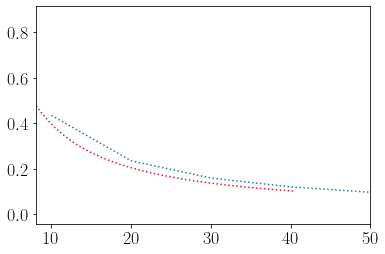

In [37]:
plt.plot(f,np.abs(vout_c), ls="dotted")
plt.plot(lfa_frequency,lfa_amplitude, c="crimson", ls='dotted')
plt.xlim(8,50)